In [78]:
from sklearn.datasets import fetch_openml

In [79]:
mnist = fetch_openml('mnist_784')

In [80]:
x,y = mnist['data'], mnist['target']

In [81]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [82]:
x.shape

(70000, 784)

In [83]:
y.shape

(70000,)

In [84]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [85]:
type(x)

numpy.ndarray

In [86]:
some_digit = x[12000]
some_digit_image = some_digit.reshape(28,28) #reshaping to plot it

In [110]:
# some_digit

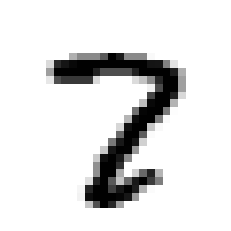

In [88]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis("off")
plt.show()

In [89]:
y[12000]

'7'

In [90]:
x_train, x_test = x[:60000], x[60000:]

In [91]:
y_train, y_test = y[:60000], y[60000:]

In [92]:
import numpy as np
shuffle_index = np.random.permutation(60000)


In [93]:
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

#Creating a 2 detector

In [94]:
y_train #the digits are in the form of strings,so needs to be first converterd into digits


array(['6', '0', '1', ..., '3', '8', '2'], dtype=object)

In [95]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [96]:
# checking wheather the string to integer conversion has taken place
y_train

array([6, 0, 1, ..., 3, 8, 2], dtype=int8)

In [97]:
y_train2 = (y_train==2)
y_test2 = (y_test==2)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
classifier = LogisticRegression()

In [100]:
classifier.fit(x_train, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
classifier.predict([some_digit])

array([False])

In [102]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(classifier, x_train, y_train2, cv = 3, scoring = 'accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [103]:
a.mean()  #checking the accuracy

0.9784666666666667

#creating a not 2 detector

In [104]:
y_train_not2 = (y_train!=2)
y_test_not2 = (y_test!=2)


In [105]:
y_train_not2

array([ True,  True,  True, ...,  True,  True, False])

In [106]:
classifier.fit(x_train, y_train_not2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
classifier.predict([some_digit])

array([ True])

In [108]:
b = cross_val_score(classifier, x_train, y_train_not2, cv = 3, scoring = 'accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [109]:
b.mean()

0.9784666666666667